In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
name = '30_Industry_Portfolios'
df_dict = pdr.DataReader(name=name, data_source='famafrench')
df = df_dict[0]
df.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,-0.92,-3.70,-3.15,1.12,1.23,0.85,-3.11,0.00,-4.04,-8.66,...,-6.84,-7.10,-7.88,-5.49,-4.04,-2.55,-1.92,-0.98,-1.18,2.24
2010-02,2.92,0.25,5.00,6.02,-1.78,3.69,6.07,0.37,5.46,15.68,...,2.92,2.84,6.30,3.05,7.25,5.89,4.32,4.50,2.71,1.87
2010-03,4.44,6.11,6.36,12.06,5.53,2.13,11.39,3.61,7.34,8.42,...,7.88,5.22,8.13,5.86,8.11,5.99,6.14,8.27,8.14,9.07
2010-04,-1.46,-1.76,-3.03,10.96,2.32,1.21,4.23,-2.22,3.08,11.43,...,3.82,0.46,3.89,4.21,3.82,3.20,1.85,7.31,0.95,3.86
2010-05,-5.37,-3.88,-7.71,-7.05,-10.12,-4.35,-5.67,-8.01,-9.99,-9.87,...,-5.91,-8.31,-7.07,-8.89,-5.98,-4.01,-5.83,-4.76,-9.12,-10.05


In [3]:
mean = df.mean()

In [4]:
cov = df.cov()
std = np.sqrt(np.diag(cov))


Text(0,0.5,'expected return')

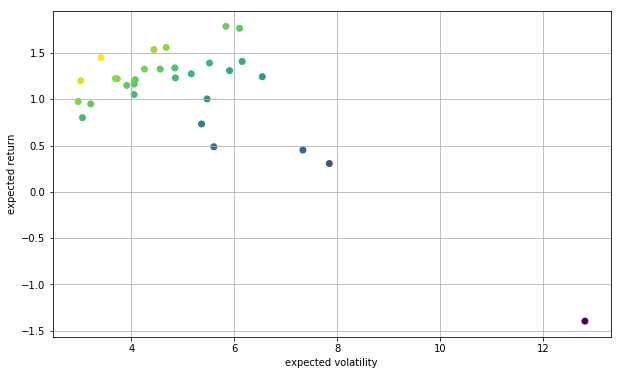

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(std, mean, c=mean/std, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')


In [9]:
import scipy.optimize as sco

In [10]:
def min_func_var(weights):
    return np.dot(weights.T, np.dot(cov, weights))


In [11]:
x0 = [1. / len(mean)] * len(mean)

In [12]:
tret = mean.mean()

In [14]:
cons = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
        {'type': 'ineq', 'fun': lambda x: np.sum(mean * x) - tret}]


In [15]:
bnds = [(0, None)] * len(mean)

In [16]:
%%time
opts = sco.minimize(fun=min_func_var, x0=x0, method='SLSQP', bounds=bnds, constraints=cons)


CPU times: user 281 ms, sys: 55 µs, total: 281 ms
Wall time: 289 ms


In [17]:
opts

     fun: 6.370075340319306
     jac: array([ 12.71122712,  12.77290165,  16.86909598,  16.11485201,
        16.69800586,  12.66693562,  12.81957662,  12.77498537,
        16.87858564,  18.60798943,  16.89769584,  18.50258517,
        16.85832965,  16.36558586,  16.65608013,  14.06348622,
        13.59067202,  15.87845296,  13.84801692,  12.70312327,
        14.66571641,  14.06810135,  15.15354234,  15.92114353,
        14.28587621,  13.08599955,  13.68709058,  12.83765054,
        13.12905812,  13.80158633])
 message: 'Optimization terminated successfully.'
    nfev: 389
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([  7.68650397e-02,   1.86978576e-01,   3.96546131e-14,
         7.90203813e-15,   1.85391931e-14,   2.15266665e-01,
         0.00000000e+00,   4.58735315e-02,   1.68068006e-14,
         4.13264393e-14,   1.24887012e-14,   2.78714497e-14,
         9.49078733e-15,   1.00449434e-14,   5.75383382e-15,
         0.00000000e+00,   0.00000000e+00,   0.000000

In [18]:
opts['fun']

6.370075340319306

In [19]:
opts['success']

True

In [20]:
mean_high = mean.max().round(3)
mean_low = round(mean.quantile(0.25), 3)
trets = np.linspace(mean_low, mean_high, 50)


In [25]:
tvols = []
for tret in trets:
    cons = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
            {'type': 'ineq', 'fun': (lambda x: np.sum(mean * x) - tret)}]
    res = sco.minimize(fun=min_func_var, x0=x0, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(np.sqrt(res['fun']))

tvols = np.array(tvols)

Text(0,0.5,'expected return')

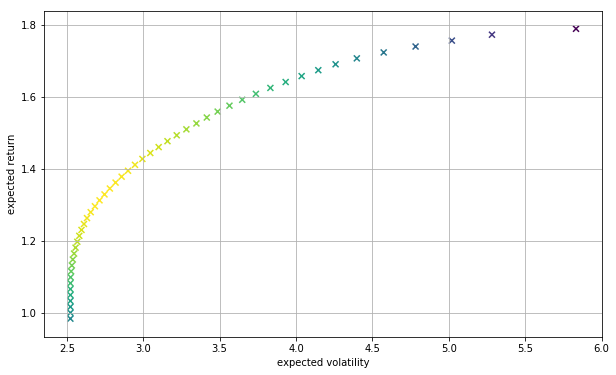

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(tvols, trets, c=trets/tvols, marker='x')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')